In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# df = pd.read_csv('/content/mymoviedb.csv', lineterminator = '\n')
df = pd.read_csv('/content/mymoviedb.csv', parse_dates=['Release_Date'], dayfirst=True, lineterminator = '\n')


/tmp/ipython-input-75-655406643.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('/content/mymoviedb.csv', parse_dates=['Release_Date'], dayfirst=True, lineterminator = '\n')


In [76]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [78]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [79]:
print(df.duplicated().sum())

0


In [80]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9827.000000,9827.000000
mean,2006-09-23 11:05:51.317798144,40.326088,1392.805536,6.439534
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.128500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.199000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.191500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.873998,2611.206907,1.129759


In [81]:
print(df['Release_Date'].head(10))



0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
5   2022-01-07
6   2022-01-12
7   2022-02-10
8   2022-02-17
9   2021-11-03
Name: Release_Date, dtype: datetime64[ns]


In [82]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)



In [83]:
print(df[df['Release_Date'].isna()])


Empty DataFrame
Columns: [Release_Date, Title, Overview, Popularity, Vote_Count, Vote_Average, Original_Language, Genre, Poster_Url]
Index: []


In [84]:
df['Release_Year'] = df['Release_Date'].dt.year


# data preprocessing


- change datatype of date from (object to date time year format)
- remove overview , language , and poster_url because these are not important for further classification
- we have to remove white space from Genre as well
- there is no null value present in dataset
- no duplicate value as well

In [85]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])


df['Release_Date'] = df['Release_Date'].dt.year


print(df['Release_Date'].dtypes)

int32


In [86]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [87]:
# dropping the colums
cols = ['Overview','Original_Language','Poster_Url']

In [88]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Year'],
      dtype='object')

In [89]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022,No Exit,2618.087,122,6.3,Thriller,2022
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


categorizing Vote_Average

we categorize the Vote_Averge into 4 categorise - popular , average , below_average, not_popluar

In [90]:
def catigorize_col(df,col,labels):

  edges =  [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
  return df


In [91]:
labels = ['not_popular','below_avg','average','popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [92]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [93]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [94]:
df.dropna(inplace=True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [95]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


now we split genre into a list and then make them that each genre have in single line

In [96]:
print(df['Genre'].head(10))
# print(df['Genre'].apply(type).value_counts())


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object


In [97]:
df['Genre'] = df['Genre'].fillna('').astype(str)

In [98]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022,The Batman,3827.658,1151,popular,Crime,2022
4,2022,The Batman,3827.658,1151,popular,Mystery,2022


casting column into category

In [99]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
 6   Release_Year  25552 non-null  int32   
dtypes: category(2), float64(1), int32(2), int64(1), object(1)
memory usage: 849.4+ KB


In [101]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19
Release_Year,100


In [102]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022,The Batman,3827.658,1151,popular,Crime,2022
4,2022,The Batman,3827.658,1151,popular,Mystery,2022


In [103]:
sns.set_style('whitegrid')

WHAT IS THE MOST FREQUENT GENRE OF MOVIES RELEASED ON NETFLIX ?

In [104]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


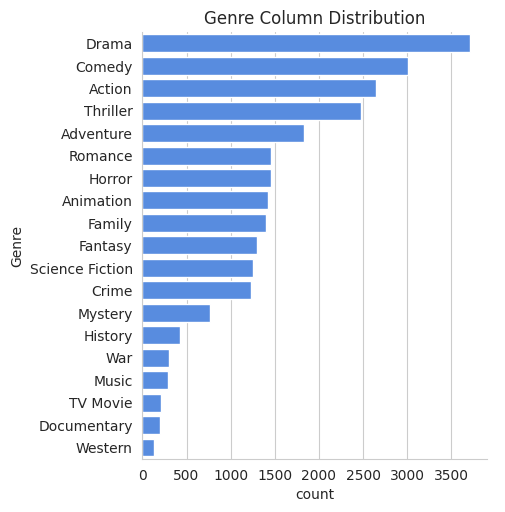

In [106]:
sns.catplot(y='Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color= '#4287f5')

plt.title('Genre Column Distribution')
plt.show()

WHICH HAVE THE HIGHEST VOTE IN VOTE AVERAGE COLUMN ??

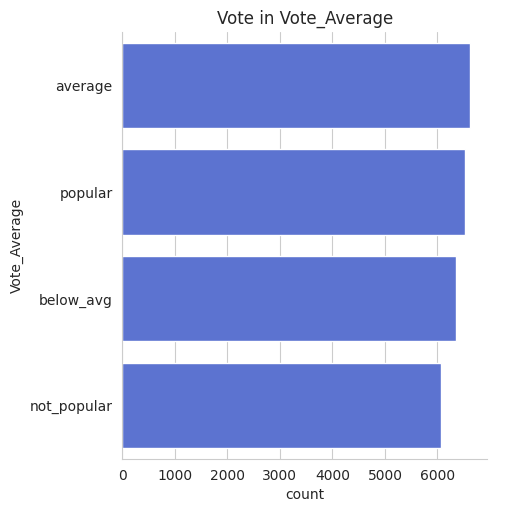

In [108]:
sns.catplot(y='Vote_Average', data = df, kind='count', order = df['Vote_Average'].value_counts().index, color = '#4967e3')

plt.title('Vote in Vote_Average')
plt.show()

WHAT MOVIE GOT HIGHEST POPULARITY AND WHAT IS ITS GENRE

In [109]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021


In [110]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


WHAT MOVIE GOT THE LOWEST PUPULARITY AND WHAT IS ITS GENRE ??

In [113]:
df.tail(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25551,1984,Threads,13.354,186,popular,Science Fiction,1984


In [114]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History,2021
25549,1984,Threads,13.354,186,popular,War,1984
25550,1984,Threads,13.354,186,popular,Drama,1984
25551,1984,Threads,13.354,186,popular,Science Fiction,1984


IN WHICH YEAR MOST MOVIE FILMED ??

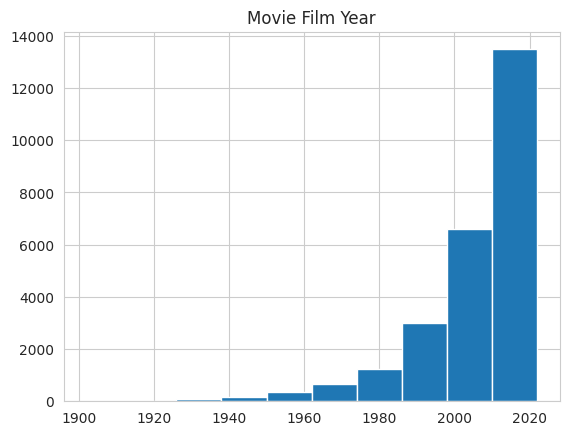

In [115]:
df['Release_Date'].hist()
plt.title('Movie Film Year')
plt.show()